<CENTER><img src="images/logos.png" style="width:50%"></CENTER>

# Dalitz plot and two body resonances in  B meson decays to three hadrons <a name="c"></a>


This project will take you through the process of analysing data from the LHCb experiment studying the dynamics of the decay process $B^+ \to K^+ K^+ K^-$. 

In this notebook we aim to:

* Produce a Dalitz plot of the simulation and real data sample
* Create ordered and binned Dalitz plots
* Identify two body resonances in the Dalitz plots

But before we start, it might be helpful to discuss the important concepts involved in this analysis. 

One last thing, just like CERN scientists you will be coding your own analysis and we will use the computer programming language Python as we've gone through the tutorials in the first two notebooks. For more python tutorials click [here](https://www.tutorialspoint.com/python/)

**Contents:**
- [What is a Dalitz plot?](#1.)
- [B mesons](#2.)
- [$B^{+} \to K^+ K^+ K^-$ Feyman diagram](#3.)
- [What is matter/antimatter asymmetry?](#1.)
- [What is matter/antimatter asymmetry?](#1.)
- [Real experiments](#4.)
- [Extension exercises](#5.)

## What is a Dalitz plot?

A Dalitz plot is a two-dimensional representation of the phase-space of the decay process. It was invented by Richard Dalitz (1925-2006). You might be wondering now what is a phase-space...

To answer this question, let's look at the decay process we are going to study, $B^+ \to K^+ K^+ K^-$. This decay can either proceed directly into the three-body final state as shown in the left-hand side figure, or it can happen via an intermediate particle, *R* (we usually call this state a **resonance**). In our case, $B^+ \to K^+ K^+ K^-$ can proceed through the decay $B^+ \to K^+ R$, then this resonance *R* can decay to $R \to K^+ K^-$. What usually happens is that we could have several possible resonant states being produced in the decay process.

Here you can see an example of a Dalitz plot:


Now let's imagine that the LHC is recording lots of data, and for each event we could end up with one of the possible resonant states. Each event is a dot in our Dalitz plot. Therefore, over a huge amount of data (large statistics), we will have lots of dots creating regions more populated and regions less populated in our Dalitz plot. These bands help us understand a low of the decay process. For instance, we could find a resonance mass and spin by just looking at the band corresponding to it! So, Dalitz plots can be used to identify these resonances which are visible bands on the Dalitz plot.

### What do we need to produce a Dalitz plot?

The kinematics of a three-body decay can be fully described using only two variables. The energies and momenta of the three kaons are not independent of each other as they all come from the decay of a B meson and energy and momentum are conserved. The axes of the plots conventionally are the squared invariant masses of two pairs of the decay products. It is a 2D plot, the x and y axes are both squared masses and the density of points in the plot shows the structure.

Consider our decay $B^+ \to K^+_1 K^+_2 K^−_3$, where we have numbered the kaons 1,2,3 to distinguish them. We can calculate the invariant mass of three possible combinations that could correspond to intermediate resonances $R_1 \to K^+_1 K^+_2$, $R_2 \to K^+_1 K^-_3$, and $R_3 \to K^+_3 K^-_3$.

---

## B mesons

In this notebook we will be studying the decays of the $B^{+}$ and $B^{-}$ mesons. A $B^{+}$ is a mesons composed of an *u* (up) quark and an anti-*b* (beauty) quark and has electric charg of +1. A $B^{-}$ is the anti-particle of the $B^{+}$, thus it is composed of and anti-*u* quark and a *b* quark and has electric charge of -1.

Bpth $B^{+}$ and $B^{-}$ mesons don't live long enough to actually see with the detector itself. Instead, we have to reconstruct them from their decay products. We don't particularly mind where the $B^{+}$/$B^{-}$s themselves come from. All you need to know here is that each time the LHC smashes two protons together, they produce lots and lots of particles, some of which are $B^{+}$/$B^{-}$s.

From theory, there are several decay routes but in this project we will be interested in the decays of the $B^{+}$ and $B^{-}$ into three charged kaons ($K^{+}$ or $K^{-}$). The $K^{+}$ is a meson composed of a *u* quark and an anti-*s* quark, and has +1 unit of charge. The $K^{-}$ is its anti-particle.

We will study the decays

$B^{+} \to K^{+} K^{+} K^{-}$

and the anti-particle correspondent decays

$B^{-} \to K^{-} K^{-} K^{+}$

---

## $B^{+} \to K^{+} K^{+} K^{-}$ Feyman diagram

As we've seen, particle physicists usually likes diagrams to represent the decay process. Here we have the Feynman diagram of the decay we are interested in

<CENTER><img src="./images/BtoKKK.png" style="width:50%"></CENTER>

In this image we have on the left side our $B^{+}$ particle, which will decay into the three kaons shown on the right side. Remember that time flows from left to right!

The brackets indicate how the particles are combined into the mesons. On the left side we can see that the $B^{+}$ meson is composed of a $u$ and $\bar{b}$ (anti-*b*) quarks and similarly we can see that the $K^{+}$ is composed of $u$ and $\bar{s}$ and the $K^{-}$ is composed of $\bar{u}$ and $s$. The lines connecting the quarks are called *quark lines*. Lastly, the $W^{+}$ boson is responsible for the interaction involved in this process. If you want to know more about the $W^{+}$ boson and the weak interaction click [here](https://en.wikipedia.org/wiki/Weak_interaction). For this project we won't need to go into details on the weak force, it's just nice to illustrate the detailed diagram.

Note that this diagram corresponds to the $B^{+} \to K^{+} K^{+} K^{-}$ decays, but you can draw the diagram for the anti-particle process by replacing every particle for its anti-particle (replace quark by its anti-quark, 'plus' sign with 'minus' sign and vice versa)


----

## Stating with a simulation sample

### Enough talk and let's start coding!

Since we have the measured momenta of the kaons (we collect this information in the detector) we can use that to reconstruct the momentum, energy and invariant mass of the two kaon combinations. Once reconstructed we can look at out Dalitz plot. Let's start by using a simulation sample. In the simulation there are no intermediate resonances and your plot should be of uniform density inside the range physically allowed by energy and momentum conservation!

To start we have to open the data that we want to analyze. As described earlier, the data is stored in a .root file. We can use a python library called uproot to access the data. Below is an example of how to open a .root file using uproot

In [1]:
import uproot
f = uproot.open("data/BtoKKK/PhaseSpaceSimulation.root")

We can inspect the contents of a file by using the method keys()

In [2]:
f.keys()

['PhaseSpaceTree;1']

We see that we have an object called 'PhaseSpaceTree'. We can obtain information about the object in the file and its type by using the method classnames()



In [3]:
f.classnames()

{'PhaseSpaceTree;1': 'TTree'}

We see that the object called mini is a TTree type. A TTree is simply columns of data stored in the .root format. Each column of data can represent a different physical quantity of a particle. For instance, its charge, energy, momentum etc.

Now we know what data the file contains, in future we can quickly access that data. We want to access the mini data. This can be done by executing the command below

In [4]:
events = uproot.open("data/BtoKKK/PhaseSpaceSimulation.root:PhaseSpaceTree")

Let's look at contents of the TTree. Essentially all the columns in the TTree called PhaseSpaceTree

In [5]:
events.keys()

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

We see columns such as the kaons momentum x-,y-, and z-components (H1_PX, H1_PY, H1_PZ). This is the transverse momentum and energy respectively of leptons. We can use the .arrays method to access events with just the columns we specify.

The data contains information about 'events' that were observed in the detector. An event refers to the particles produced when an interaction took place when two proton are collided at the LHC. The data you have includes information about particles observed in the detector after each collision.

We are interested in analysing the decays of particles called B+ or B- mesons decaying into three other mesons called kaons (K+ or K-). The events you have been given are those in which this process may have occurred. The detector has been used to reconstruct tracks that may have come from the kaons. You are given the measured momenta, charge, and likelihood of the tracks being kaons. You are given information for three tracks in each event, the ones that could be the three kaons that a B+ or B- meson has decayed into. 

### Creating Dalitz variables

Since the Dalitz variables are the square of the masses from the combination of two kaons, we need to reconstruct these invariant masses. 
We want to run over all the data and reconstruct the $K^+_1 K^-_3$ and $K^+_2 K^-_3$ masses. To do this we will access events using the arrays method again. Let's look at doing this.

You can plot any features of the data in a histogram, for instance let's try to plot the first kaon candidate's momentum x-component (H1_PX). 

In the first stage we define a histogram. To do this we can import the python hist library. Once we have done that we can define a histogram. Its name is hist and the x axis is named mass [GeV]. The three initial arguments indicate that this histogram contains 30 bins which fill the gap from 40 to 140.

In [6]:
import hist
from hist import Hist

hist1 = Hist(hist.axis.Regular(100,-150e3,150e3, label = "px (GeV)"))

Now to fill our histogram! The first step is to extract momentum x-component from our TTree using uproot. We'll want to extract it in the form of a numpy array like so:

In [7]:
p1x = events["H1_PX"].array(library="np")

Now we can fill our histogram using the .fill() function from hist:

In [8]:
hist1.fill(p1x)

Hist(Regular(100, -150000, 150000, label='px (GeV)'), storage=Double()) # Sum: 49978.0 (50000.0 with flow)

Plotting using matplotlib:

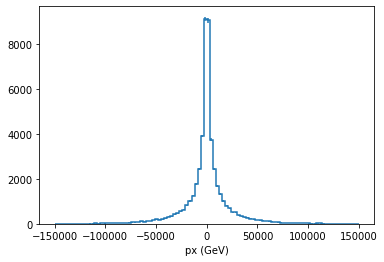

In [9]:
import matplotlib.pyplot as plt
import numpy as np
hist1.plot()
plt.show()

Great! Momentum is a **vector** quantity, it has x,y and z components. Now let's try to calculate the magnitude of the momentum, $p^{2} = p_{x}^{2} + p_{y}^{2} + p_{z}^{2}$, of the first kaon candidate and plot it into a histogram: 

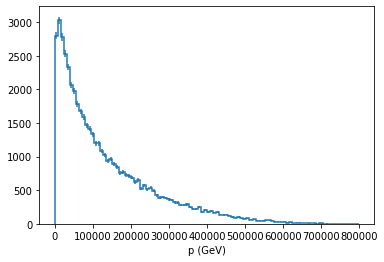

In [10]:
# Storing the momentum components in numpy arrays
p1y = events["H1_PY"].array(library="np")
p1z = events["H1_PZ"].array(library="np")

# Declaring the histogram
hist2 = Hist(hist.axis.Regular(100,0,800e3, label = "p (GeV)"))

# Calculating the momentum
p1 = np.sqrt((p1x*p1x)+(p1y*p1y)+(p1z*p1z))

# Filling the histogram
hist2.fill(p1)

# Plotting the momentum distribution
hist2.plot()
plt.show()

Note that now our histogram only has positive values (as expected!), we can't have negative momentum values.

Now let's calculate the energy and mass!

Einstein's theory of special relativity relates Energy, mass and momentum. We have measured the momentum of the kaon candidates in the detector, and have just plotted one of the components of the momentum of the kaon, and the magnitude of the momentum. The invariant mass of the kaon is well known and you can look this up. We wish to determine the energy of the kaons.

To calculate the energy of the first kaon candidate we can use:

$ E^{2} = p^{2} + m^{2}$

So let's try that..

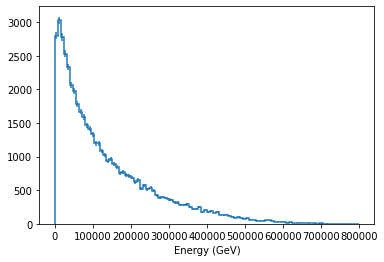

In [11]:
m_kaon = 0.493677

# Declaring the histogram
hist3 = Hist(hist.axis.Regular(100,-800e-3,800e3, label = "Energy (GeV)"))

# Calculating the momenergyentum
e1 = np.sqrt((p1*p1)+(m_kaon*m_kaon))

# Filling the histogram
hist3.fill(e1)

# Plotting the momentum distribution
hist3.plot()
plt.show()

Your turn! Calculate the momenta and energies of the second and third kaon candidates

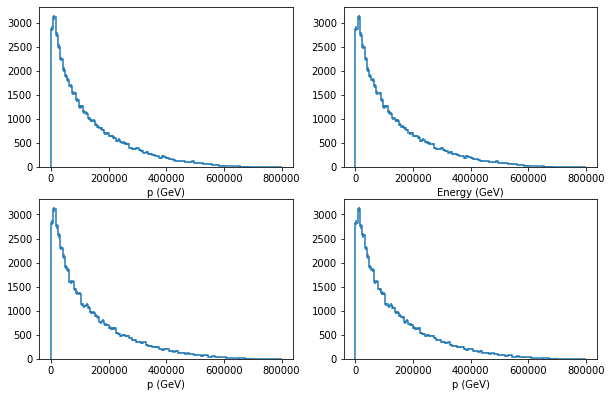

In [49]:
# Storing the momentum components in numpy arrays
p2x = events["H2_PX"].array(library="np")
p2y = events["H2_PY"].array(library="np")
p2z = events["H2_PZ"].array(library="np")

p3x = events["H3_PX"].array(library="np")
p3y = events["H3_PY"].array(library="np")
p3z = events["H3_PZ"].array(library="np")

# Declaring histograms
hist4 = Hist(hist.axis.Regular(100,0,800e3, label = "p (GeV)"))
hist5 = Hist(hist.axis.Regular(100,-800e-3,800e3, label = "Energy (GeV)"))
hist6 = Hist(hist.axis.Regular(100,0,800e3, label = "p (GeV)"))
hist7 = Hist(hist.axis.Regular(100,-800e-3,800e3, label = "Energy (GeV)"))

# Calculating energy and momentum of the second particle
p2 = np.sqrt((p2x*p2x)+(p2y*p2y)+(p2z*p2z))
e2 = np.sqrt((p2*p2)+(m_kaon*m_kaon))

# Filling the histograms
hist4.fill(p2)
hist5.fill(e2)

# Calculating energy and momentum of the second particle
p3 = np.sqrt((p3x*p3x)+(p3y*p3y)+(p3z*p3z))
e3 = np.sqrt((p3*p3)+(m_kaon*m_kaon))

# Filling the histograms
hist6.fill(p3)
hist7.fill(e3)

# Plotting energy and momentum distributions
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
hist4.plot()
plt.subplot(3,2,2)
hist5.plot()
plt.subplot(3,2,3)
hist6.plot()
plt.subplot(3,2,4)
hist6.plot()
plt.show()

## Including features of the B meson

In this analysis we are looking for B+ or B- mesons (see B meson) that have decayed into the three charged kaons.

Energy is a conserved quantities. This means that you can use the energy of the three 'daughter' kaons, which you have calculated above, to calculate the energy that the B meson that decayed into them must have.

Momentum is also a conserved quantity. Hence you can also use the momenta of the 'daughter' kaons to calculate the momentum of the B meson. But be careful - momentum is a vector quantity.

Using the Energy of the B meson and the magnitude of the momentum of the B meson you can use the energy-momentum relationship again. This time you are applying it to the B meson. This will allow you to calculate the invariant mass of the B meson.

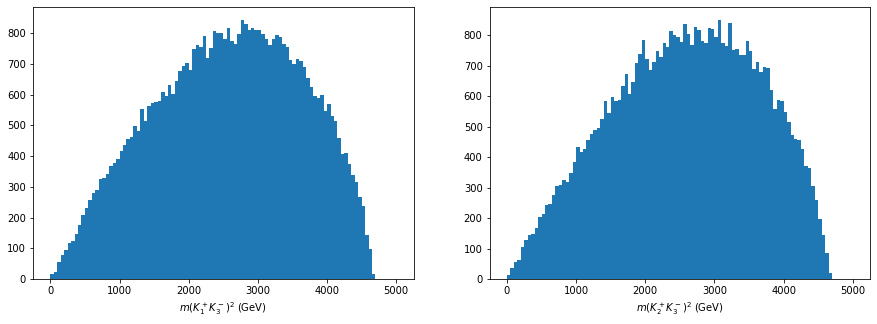

In [50]:
from TLorentzVector import TLorentzVector
import hist
from hist import Hist

#k1  = TLorentzVector()
#k2 = TLorentzVector()
#k3 = TLorentzVector()
#B = TLorentzVector()

histR13 = Hist(hist.axis.Regular(100,0,5000, label = "$m(K^+_1 K^-_3)^2$ (GeV)"))
histpxR13 = Hist(hist.axis.Regular(100,-800e-3,800e3, label = "Energy (GeV)"))

histR23 = Hist(hist.axis.Regular(100,0,5000, label = "$m(K^+_2 K^-_3)^2$ (GeV)"))
histpxR23 = Hist(hist.axis.Regular(100,-800e-3,800e3, label = "Energy (GeV)"))


#k1.SetPxPyPzE(p1x,p1y,p1z,e1)
#k2.SetPxPyPzE(p2x,p2y,p2z,e2)
#k3.SetPxPyPzE(p3x,p3y,p3z,e3)

# K1K3 momentum conservation
pxR13 = p1x+p3x
pyR13 = p1y+p3y
pzR13 = p1z+p3z

# K1K3 meson energy conservation
eR13 = e1+e3

pR13 = np.sqrt((pxR13**2)+(pyR13**2)+(pzR13**2))
    
mR13 = np.sqrt((eR13**2)-(pR13**2))
    
histR13.fill(mR13)
histpxR13.fill(pR13)

# K2K3 momentum conservation
pxR23 = p2x+p3x
pyR23 = p2y+p3y
pzR23 = p2z+p3z

# K2K3 meson energy conservation
eR23 = e2+e3

pR23 = np.sqrt((pxR23**2)+(pyR23**2)+(pzR23**2))
    
mR23 = np.sqrt((eR23**2)-(pR23**2))
    
histR23.fill(mR23)
histpxR23.fill(pR23)

import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
histR13.plot(histtype = "fill")
plt.subplot(1,2,2)
histR23.plot(histtype = "fill")
plt.show()

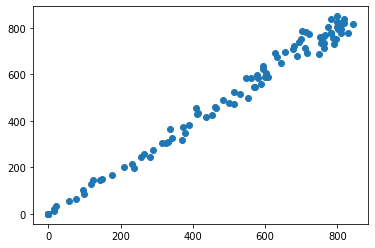

In [35]:
# Plotting the Dalitz plot
plt.scatter(histR13, histR23)
plt.show()

Great job! You can see nnow the Dalitz plot of our simulation sample. Note that there are no higher density bands here. The Dalitz plot is uniformly distributed because there are no resonances in our simulation sample. The next step is to move to real LHCb data. Now it's up to you!

## Working with real data

So far, we've looked at what we call a simulation data to obtain the Dalitz plot of the $B^+ \to K^- K^- K^+$ decay. The events we see in our Dalitz plot are simulated $B^+ \to K^- K^- K^+$ decays but in real life, determining the Dalitz plot can be way more interesting, with the bands we've been discussing. Before looking at the data Dalitz plot, we need one additional step. 

When we are analysing data collected by the LHCb, we can't control what particles are going to be produced, instead we collect everything, so our data samples not only have events that we are interested in (signal events) but also events that are not from the $B^+ \to K^- K^- K^+$ decays (background events). And it's our job to apply some sort of requirements (cuts) to distinguish the interesting events from the others.

The following steps are required now:

* Firstly we need to filter out the data that is not from the $B^+ \to K^- K^- K^+$ channel, or the antiparticle $B^- \to K^+ K^+ K^-$
* Then we can plot the histogram of the B meson mass for the real data and observe how different cuts affects the data

The data samples we are going to look have been filteres to select only events that are likely to have come from B+ or B- mesons decaying into three final state charged particles. In our case, we are interested when these particles are charged kaons ($K^+$ or $K^-$).

### Preselection

To select the interesting events, we are going to apply some cuts and only the events satisfying this requirement are kept in our sample. In our case we want three final state tracks that:

1. are **not** muons: `!H1_isMuon` where `!` means `not` (same goes for `H2` and `H3`)
2. each candidate has a low probability of being a pion: `H1_ProbPi < 0.5`
3. each candidate has a high probability of being a kaon: `H1_ProbK > 0.5`

So let's open our LHCb data and select only events satisfying this criteria:

In [51]:
# Define preselection
preselection = "H1_ProbPi < 0.5 & H2_ProbPi < 0.5 & H3_ProbPi < 0.5 & H1_ProbK > 0.5 & H2_ProbK > 0.5 & H3_ProbK > 0.5 & !H1_isMuon & !H2_isMuon & !H3_isMuon"
# Load real LHCb data
real_data = uproot.open('data/BtoKKK/B2HHH_MagnetUpDown.root:DecayTree', where=preselection)

In [54]:
real_data.num_entries("H1_ProbPi < 0.5 & H2_ProbPi < 0.5 & H3_ProbPi < 0.5 & H1_ProbK > 0.5 & H2_ProbK > 0.5 & H3_ProbK > 0.5 & !H1_isMuon & !H2_isMuon & !H3_isMuon")

TypeError: 'int' object is not callable

In [37]:
real_data.keys()

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

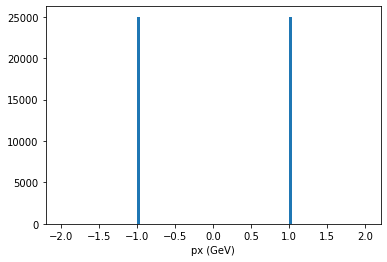

In [38]:
import hist
from hist import Hist

hist_c = Hist(hist.axis.Regular(100,-2,2, label = "px (GeV)"))
c1 = events["H1_Charge"].array(library="np")
c2 = events["H2_Charge"].array(library="np")
c3 = events["H3_Charge"].array(library="np")

hist_c.fill(c1)
import matplotlib.pyplot as plt

hist_c.plot(histtype = "fill")
plt.show()

Now let's let's calculate the invariant masses of the two kaon combinations as we did before for the real data and plot a histogram of each combination. 

Finally, let's check the Dalitz plot for our data sample!

Compare the Dalitz plots of the real data with the one for the simulation. What are the most striking differences?

### Ordering Dalitz variables

You can make a further improvement to allow you to observe the resonances easier. Your resonances R13 and R23 are both composed of the same particle types, $K^+ K-$, and hence have the same distributions. It is useful to impose an ordering which distinguishes the resonances. We can call the resonances $R_{Low}$ and $R_{High}$. In each event $R_{Low}$ is the resonance with the lower mass and the other corresponds to the higher mass combination of kaons. You can now use the mass of these ordered resonances as your Dalitz plot variables, thus effectively "folding" your Dalitz plot so that one axis always has a higher value than the other.

Hint: Ordered Dalitz plot - You can find the maximum of the mass of $R_{Low}$ vs $R_{High}$ elementwise on one axis, and the minimum of on the other. You can use `numpy.min(a,b)` and `numpy.max(a,b)` to perform elementwise comparisons between two arrays a and b and return one array filled by either the individual min/max element from the elementwise comparisons.

## Binned Dalitz plot

You can improve the representation of your Dalitz plot by binning the data. The hist2d function can be used to make a 2D histogram. The number of bins specification in the hist2d function is the number of bins in one axis.



In [39]:
# plot a binned Dalitz Plot
# use colorbar() to make a legend for your plot at the side

## Two body resonances

You can now use your Dalitz plot to identify the intermediate resonances that you see in your plots. The resonances will have shown up as bands of higher density of points on the plots. You can use the particle data group tables of mesons to identify which particles these correspond to. The tables give the masses and widths of the particles and their decay modes. You are looking for mesons with the masses corresponding to where you see the bands and that decay into K+K-.

Congratulations! You have succesfully made a Dalitz plot and used it to observe the presence of intermediate particles in the decay of your charged B meson into three charged kaons.